In [2]:
import wandb
import pandas as pd

api = wandb.Api()

In [2]:
def reorder (pivoted_df):
    top_two_runs = ['Ensemble_all', 'LSTM_FFN']
    other_runs = [run for run in pivoted_df.index if run not in top_two_runs]
    new_order = top_two_runs + other_runs

    pivoted_df = pivoted_df.loc[new_order]

    return pivoted_df

def get_tables(run_ids):
    all_tables = []
    for run_name, run_id in run_ids.items():
        try:
            run = api.run(f"qianyue-university-of-stuttgart/teamlab_deepfake/runs/{run_id}")
            summary = run.summary._json_dict
            overall_eer = summary["eval_eer_overall"]
            eer_threshold = summary["eval_threshold_overall"]
        except wandb.errors.CommError as e:
            print(f"Could not find summary for run {run_name}: {e}")

        try:
            art = api.artifact(f"qianyue-university-of-stuttgart/teamlab_deepfake/run-{run_id}-per_attack_analysis_table:v0")
            table = art.get("per_attack_analysis_table")

            # Convert the wandb.Table to a pandas DataFrame
            # Following from the last code example:
            df = table.get_dataframe()

            #df = pd.DataFrame(table.data, columns=table.columns)
            df.loc[13] = ["ALL",overall_eer,eer_threshold,overall_eer,'nan']
            df['run_name'] = run_name
            all_tables.append(df)
        except wandb.errors.CommError as e:
            print(f"Could not find artifact for run {run_name}: {e}")

        combined_df = pd.concat(all_tables, ignore_index=True)

        df = combined_df.copy()
            
    df['EER'] = df['optimal_eer'].astype(float)
    df['FAR'] = df['far_at_global_threshold'].astype(float)

    # Select only the columns we need for the pivot
    df = df[['run_name', 'attack_type', 'EER', 'FAR']]


    pivoted_df = df.pivot_table(
        index='run_name',               # Each run gets its own row
        columns='attack_type',          # Each attack type becomes a column
        values=['EER', 'FAR']           # These are the values to fill the table
    )

    pivoted_df = reorder(pivoted_df)

    # swap the column levels to group by attack type
    pivoted_df.columns = pivoted_df.columns.swaplevel(0, 1)

    # Sort the columns to ensure a logical order
    pivoted_df = pivoted_df.sort_index(axis=1)

    # Format the final table for readability
    styled_df = pivoted_df.style.format("{:.2%}")

    print("--- Final Summary Table ---")
    display(styled_df)


    # PIVOT FOR EER 
    eer_df = df.pivot_table(
        index='run_name',
        columns='attack_type',
        values='EER'  # Request only the EER values
    )
    eer_df = reorder(eer_df)

    # PIVOT FOR FAR 
    far_df = df.pivot_table(
        index='run_name',
        columns='attack_type',
        values='FAR'  # Request only the FAR values
    )
    far_df = reorder(far_df)

    # Format and print both tables
    print("--- EER Summary Table ---")
    display(eer_df.style.format("{:.2%}"))

    print("\n--- FAR Summary Table ---")
    display(far_df.style.format("{:.2%}"))


In [3]:
# stable model - 11
run_ids_11 = {
    "Ensemble_all": "ey187sci",
    "CNN": "yt3etcul",
    "LSTM_FFN": "2rmr2frn",
    "Ensemble_A01": "ledjd762",
    "Ensemble_A02": "q0c4uoda",
    "Ensemble_A03": "rn0tcym5",
    "Ensemble_A04": "6v4weqjb",
    "Ensemble_A05": "066fevn9",
    "Ensemble_A06": "q8prlvxa"
}

# unstable model - 08
run_ids_08 = {
    "Ensemble_all": "5u8c67if",
    "CNN": "c391i1ub",
    "LSTM_FFN": "d61kmxsa",
    "Ensemble_A01": "xv2wv7j5",
    "Ensemble_A02": "kre4vj8n",
    "Ensemble_A03": "04pcde3v",
    "Ensemble_A04": "uaq2p1bm",
    "Ensemble_A05": "4epcsjyl",
    "Ensemble_A06": "q8wpakrk"
}

# good(maybe) model - 12
run_ids_12 = {
    "Ensemble_all": "iy7stjxs",
    "CNN": "pgpml4n7",
    "LSTM_FFN": "ylhwamom",
    "LSTM": "3vxp2dbg",
    "LSTM_pitch": "7guxcenz",
    "LSTM_hnr": "r5555u7z",
    "FFN": "lifu4lpv",
    "FFN_jitter": "4heuinbw",
    "FFN_shimmer": "52jyt8o0",
    "Ensemble_A01": "fmnwwxyu",
    "Ensemble_A02": "dsw1bo3l",
    "Ensemble_A03": "4x33z1n7",
    "Ensemble_A04": "3hz9ohht",
    "Ensemble_A05": "o8dynyxe",
    "Ensemble_A06": "b1u2uejo"
}

In [38]:
get_tables(run_ids_11)

KeyError: 'eval_eer_overall'

In [ ]:
get_tables(run_ids_08)

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


--- Final Summary Table ---


--- EER Summary Table ---


attack_type,A07,A08,A09,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
run_name,,,,,,,,,,,,,
Ensemble_all,0.29%,8.44%,0.41%,0.41%,0.29%,2.20%,0.19%,0.26%,0.38%,1.28%,60.99%,79.36%,21.04%
LSTM_FFN,7.47%,11.56%,0.69%,4.23%,1.96%,1.55%,0.88%,0.86%,1.52%,2.40%,25.82%,54.84%,9.53%
CNN,7.67%,21.33%,5.09%,3.46%,3.82%,5.15%,1.97%,4.48%,4.34%,7.45%,45.68%,27.25%,29.10%
Ensemble_A01,0.29%,8.44%,0.41%,0.41%,0.29%,2.20%,0.19%,0.26%,0.38%,1.28%,60.99%,79.36%,21.04%
Ensemble_A02,39.70%,32.74%,8.59%,59.69%,27.19%,46.01%,40.83%,16.77%,30.67%,55.39%,54.93%,83.68%,30.71%
Ensemble_A03,61.54%,44.58%,24.77%,68.70%,53.75%,40.09%,80.28%,27.06%,34.59%,47.46%,78.12%,80.28%,84.43%
Ensemble_A04,84.47%,80.83%,30.28%,74.64%,66.18%,4.96%,82.92%,14.21%,7.15%,1.61%,34.03%,22.37%,45.03%
Ensemble_A05,35.35%,34.62%,15.87%,31.46%,19.70%,38.81%,9.03%,19.56%,30.13%,37.43%,25.87%,58.41%,18.98%
Ensemble_A06,69.03%,74.42%,17.69%,46.19%,32.15%,40.64%,14.83%,28.41%,36.28%,45.50%,18.94%,43.12%,5.45%



--- FAR Summary Table ---


attack_type,A07,A08,A09,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
run_name,,,,,,,,,,,,,
Ensemble_all,0.00%,8.32%,0.00%,0.00%,0.00%,0.22%,0.00%,0.00%,0.00%,0.06%,60.99%,79.37%,21.04%
LSTM_FFN,6.37%,11.36%,0.00%,0.75%,0.10%,0.00%,0.00%,0.02%,0.00%,0.39%,44.65%,87.08%,7.51%
CNN,3.58%,25.09%,1.71%,0.79%,0.90%,1.77%,0.06%,1.18%,1.14%,4.09%,78.80%,42.25%,47.80%
Ensemble_A01,0.00%,8.32%,0.00%,0.00%,0.00%,0.22%,0.00%,0.00%,0.00%,0.06%,60.99%,79.37%,21.04%
Ensemble_A02,39.23%,27.39%,0.85%,72.81%,17.62%,50.94%,41.09%,4.03%,20.82%,66.18%,66.18%,94.38%,25.15%
Ensemble_A03,63.59%,42.67%,8.10%,76.07%,52.97%,27.39%,92.12%,5.80%,19.37%,40.33%,94.36%,91.31%,97.68%
Ensemble_A04,95.48%,92.25%,23.83%,84.33%,74.09%,2.50%,95.81%,3.72%,0.69%,0.04%,29.65%,16.42%,46.87%
Ensemble_A05,43.20%,39.99%,3.60%,35.12%,10.26%,50.69%,0.51%,7.37%,31.32%,48.33%,21.49%,80.32%,8.79%
Ensemble_A06,92.10%,96.09%,3.85%,55.56%,27.05%,44.59%,2.26%,15.89%,35.00%,55.33%,6.04%,48.66%,0.20%


In [4]:
get_tables(run_ids_12)

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


--- Final Summary Table ---


--- EER Summary Table ---


attack_type,A07,A08,A09,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,ALL
run_name,,,,,,,,,,,,,,
Ensemble_all,2.24%,5.56%,0.38%,0.94%,0.55%,0.79%,0.39%,0.42%,0.59%,0.94%,21.13%,47.26%,7.18%,10.17%
LSTM_FFN,2.93%,8.61%,0.38%,1.39%,0.65%,0.86%,0.53%,0.55%,0.90%,2.03%,23.60%,55.29%,8.77%,11.39%
CNN,13.00%,18.23%,4.21%,6.69%,6.21%,8.53%,6.17%,6.58%,5.39%,9.38%,41.06%,40.68%,31.89%,18.28%
Ensemble_A01,0.69%,2.57%,0.39%,0.75%,0.57%,5.19%,11.17%,0.35%,0.35%,4.01%,39.58%,61.19%,39.42%,17.55%
Ensemble_A02,83.07%,52.07%,44.35%,92.57%,75.58%,76.40%,97.92%,43.02%,57.49%,71.63%,53.54%,82.70%,32.17%,65.19%
Ensemble_A03,84.98%,55.25%,40.74%,90.15%,80.65%,68.74%,97.88%,43.71%,54.85%,65.04%,73.20%,77.39%,72.24%,68.43%
Ensemble_A04,33.01%,46.70%,2.62%,24.42%,18.62%,0.29%,19.09%,0.87%,0.45%,0.61%,32.74%,17.77%,45.73%,21.17%
Ensemble_A05,26.66%,26.66%,8.20%,22.37%,10.20%,44.14%,24.69%,9.46%,22.73%,43.69%,26.66%,76.15%,16.49%,26.66%
Ensemble_A06,81.42%,72.63%,34.31%,74.28%,57.36%,67.33%,90.72%,44.36%,53.87%,58.65%,19.11%,39.58%,4.52%,53.83%



--- FAR Summary Table ---


attack_type,A07,A08,A09,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,ALL
run_name,,,,,,,,,,,,,,
Ensemble_all,0.20%,4.19%,0.00%,0.31%,0.02%,0.00%,0.00%,0.00%,0.00%,0.08%,39.70%,82.99%,4.64%,10.17%
LSTM_FFN,0.12%,7.47%,0.00%,0.45%,0.08%,0.02%,0.00%,0.00%,0.00%,0.33%,46.28%,87.51%,5.86%,11.39%
CNN,10.81%,18.21%,1.57%,3.40%,3.17%,5.23%,2.69%,3.36%,2.73%,6.37%,67.13%,64.77%,48.25%,18.28%
Ensemble_A01,0.08%,0.71%,0.00%,0.10%,0.02%,3.93%,8.79%,0.00%,0.00%,3.58%,75.50%,89.97%,56.84%,17.55%
Ensemble_A02,89.40%,47.19%,35.55%,98.51%,79.96%,82.42%,99.61%,32.66%,54.46%,76.43%,43.24%,90.44%,17.66%,65.19%
Ensemble_A03,88.60%,51.65%,26.52%,95.87%,85.37%,68.78%,99.86%,28.31%,45.83%,63.17%,77.86%,82.28%,75.50%,68.43%
Ensemble_A04,34.27%,51.59%,1.87%,25.05%,18.21%,0.00%,18.88%,0.06%,0.00%,0.02%,42.61%,15.89%,66.77%,21.17%
Ensemble_A05,32.72%,26.68%,0.85%,22.36%,2.75%,59.34%,24.68%,1.02%,22.73%,53.72%,34.55%,89.54%,10.24%,26.66%
Ensemble_A06,93.33%,87.28%,20.55%,84.98%,60.07%,74.50%,94.12%,37.83%,53.91%,62.15%,2.32%,28.67%,0.06%,53.83%


| Model | LR Scheduling | Regularization | Loss Curve  | Thresholds | EER Distribution   | Issue            |
| ----- | ------------- | -------------- | ----------- | ---------- | ------------------ | ------------------ |
| 1     | None        | Low           | Fluctuating | Abnormal   | Pooled: 12%; Skewed heavily     | Overfitting maybe|
| 2     | Yes & initial smaller         | High        | Smooth      | Abnormal   | Pooled: 23%; Balanced-ish       | Underfitting    |
| 3     | Yes         | Low         | Less Smooth      | Normal     | Pooled: 10%; Skewed reasonably | Good      |


### plots

wandb:   1 of 1 files downloaded.  


Sample DataFrame Head:
  attack_type  optimal_eer  optimal_threshold  far_at_global_threshold  \
0         A07     0.022409           0.330290                 0.002035   
1         A08     0.055582           0.812811                 0.041921   
2         A09     0.003837           0.000193                 0.000000   
3         A10     0.009371           0.032911                 0.003053   
4         A11     0.005466           0.003930                 0.000204   

   num_examples  
0          4914  
1          4914  
2          4914  
3          4914  
4          4914  

Sample DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   attack_type              13 non-null     object 
 1   optimal_eer              13 non-null     float64
 2   optimal_threshold        13 non-null     float64
 3   far_at_global_threshold

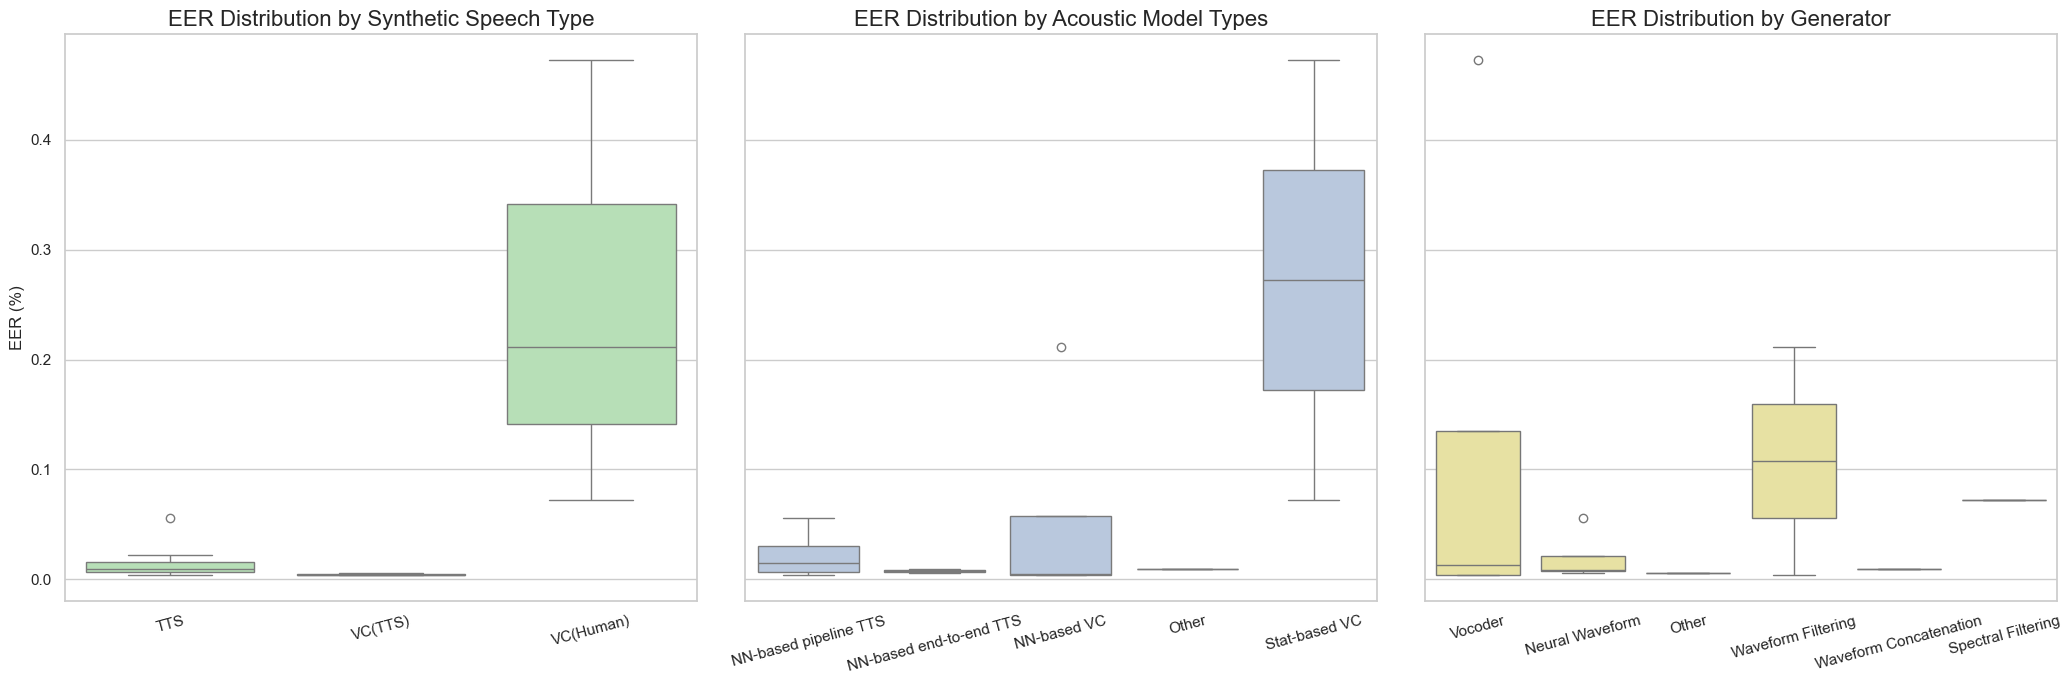

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Define your attack type mappings ---

# Group 1: Primary Attack Type
group1_mapping = {
    'TTS': ['A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A16'],
    'VC(TTS)': ['A13', 'A14', 'A15'],
    'VC(Human)': ['A17', 'A18', 'A19']
}

# Group 2: Core Model Paradigm (based on your latest specified groupings)
group2_mapping = {
    'NN-based pipeline TTS': ['A07', 'A08', 'A09', 'A12'],
    'NN-based end-to-end TTS': ['A10', 'A11'],
    'NN-based VC': ['A13', 'A14', 'A15', 'A17'],
    'Stat-based VC': ['A18', 'A19']
}

# Group 3: generator
group3_mapping = {
    'Neural Waveform': ['A08', 'A10', 'A12', 'A15'],
    'Vocoder': ['A07', 'A09', 'A14', 'A18'],
    'Waveform Filtering': ['A13', 'A17'],
    'Spectral Filtering': ['A19'],
    'Waveform Concatenation': ['A16'],
    'Other': ['A11']
}

# --- 2. Create a Sample DataFrame ---
art = api.artifact(f"qianyue-university-of-stuttgart/teamlab_deepfake/run-iy7stjxs-per_attack_analysis_table:v0")
table = art.get("per_attack_analysis_table")

# Convert the wandb.Table to a pandas DataFrame
# Following from the last code example:
df = table.get_dataframe()


print("Sample DataFrame Head:")
print(df.head())
print("\nSample DataFrame Info:")
print(df.info())

# --- 3. Prepare data for plotting ---

# Create 'Group_1_Category' column
df['Group_1_Category'] = df['attack_type'].apply(
    lambda x: next((category for category, types in group1_mapping.items() if x in types), 'Other')
)

# Create 'Group_2_Category' column
df['Group_2_Category'] = df['attack_type'].apply(
    lambda x: next((category for category, types in group2_mapping.items() if x in types), 'Other')
)

# Create 'Group_3_Category' column
df['Group_3_Category'] = df['attack_type'].apply(
    lambda x: next((category for category, types in group3_mapping.items() if x in types), 'Other')
)

print("\nDataFrame with Categories Head:")
print(df.head())

# --- 4. Create the Box Plots ---

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

# Define custom colors for the two groups
custom_colors = {
    'light_blue': '#B3C7E3', # Estimated color from left box
    'light_green': '#B0E6B0', # Estimated color from right box
    'light_yellow': "#F2EA98"
}
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True) # sharey=True ensures same Y-axis scale

# Plot for Group 1: Primary Attack Type
sns.boxplot(
    x='Group_1_Category',
    y='optimal_eer',
    data=df,
    ax=axes[0],
    color=custom_colors['light_green'],
    showfliers=True # Show outliers
)
axes[0].set_title('EER Distribution by Synthetic Speech Type', fontsize=16)
axes[0].set_xlabel('', fontsize=12)
axes[0].set_ylabel('EER (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=15) # Rotate labels for readability

# Plot for Group 2: Core Model Paradigm
sns.boxplot(
    x='Group_2_Category',
    y='optimal_eer',
    data=df,
    ax=axes[1],
    color=custom_colors['light_blue'],
    showfliers=True # Show outliers
)
axes[1].set_title('EER Distribution by Acoustic Model Types', fontsize=16)
axes[1].set_xlabel('', fontsize=12)
axes[1].set_ylabel('') # Y-label already on left subplot
axes[1].tick_params(axis='x', rotation=15) # Rotate labels for readability

# Plot for Group 3: Generator
sns.boxplot(
    x='Group_3_Category',
    y='optimal_eer',
    data=df,
    ax=axes[2],
    color=custom_colors['light_yellow'],
    showfliers=True # Show outliers
)
axes[2].set_title('EER Distribution by Generator', fontsize=16)
axes[2].set_xlabel('', fontsize=12)
axes[2].set_ylabel('') # Y-label already on left subplot
axes[2].tick_params(axis='x', rotation=15) # Rotate labels for readability

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

wandb:   1 of 1 files downloaded.  


  attack_type  optimal_eer  optimal_threshold  far_at_global_threshold  \
0         A07     0.022409           0.330290                 0.002035   
1         A08     0.055582           0.812811                 0.041921   
2         A09     0.003837           0.000193                 0.000000   
3         A10     0.009371           0.032911                 0.003053   
4         A11     0.005466           0.003930                 0.000204   

   num_examples  
0          4914  
1          4914  
2          4914  
3          4914  
4          4914  
DataFrame B1:
    A07   A08   A09    A10   A11   A12    A13    A14   A15  A16    A17   A18
B1  0.0  0.04  0.14  15.16  0.08  4.74  26.15  10.85  1.26  0.0  19.62  3.81

DataFrame B2:
      A07   A08  A09    A10   A11   A12   A13   A14   A15   A16   A17   A18
B2  12.86  0.37  0.0  18.97  0.12  4.92  9.75  1.22  2.22  6.31  7.71  3.58


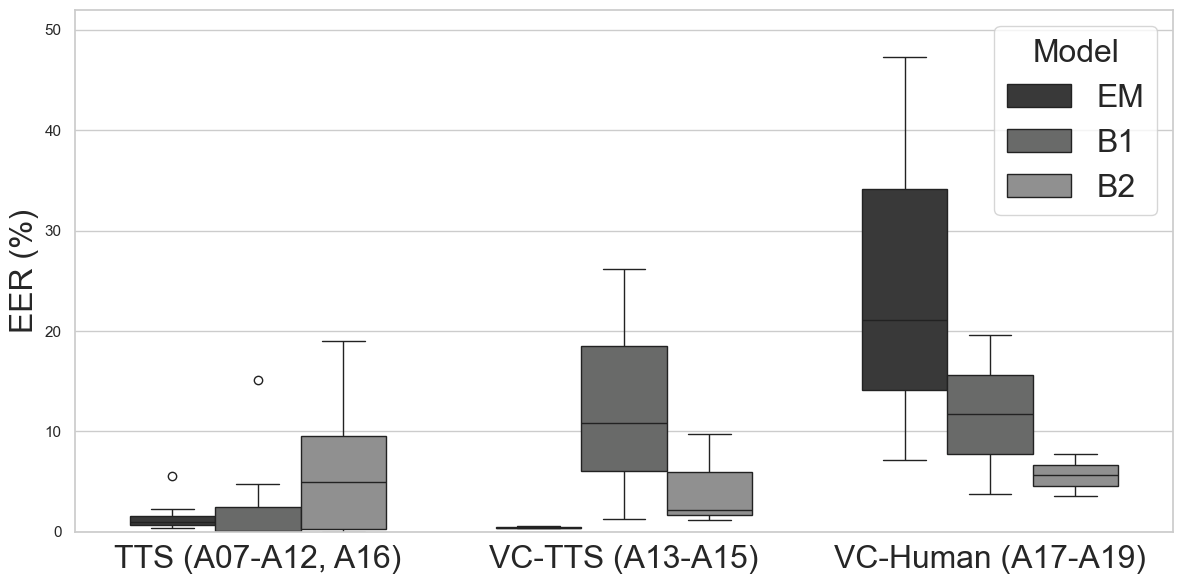

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Define your attack type mappings ---

# Group 1: Primary Attack Type
mapping = {
    'TTS (A07-A12, A16)': ['A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A16'],
    'VC-TTS (A13-A15)': ['A13', 'A14', 'A15'],
    'VC-Human (A17-A19)': ['A17', 'A18', 'A19']
}

art = api.artifact(f"qianyue-university-of-stuttgart/teamlab_deepfake/run-iy7stjxs-per_attack_analysis_table:v0")
table = art.get("per_attack_analysis_table")
df = table.get_dataframe()
print(df.head())
df['optimal_eer'] = df['optimal_eer'] * 100

# Create 'Group_1_Category' column
df['Group_1_Category'] = df['attack_type'].apply(
    lambda x: next((category for category, types in mapping.items() if x in types), 'Other')
)

data_b1 = [0.00, 0.04, 0.14, 15.16, 0.08, 4.74, 26.15, 10.85, 1.26, 0.00, 19.62, 3.81, 0.04]
data_b2 = [12.86, 0.37, 0.00, 18.97, 0.12, 4.92, 9.75, 1.22, 2.22, 6.31, 7.71, 3.58, 13.94]

# Create the column names from A07 to A19
columns = [f'A{i:02d}' for i in range(7, 20)]

# Create the dataframes and drop the last column
df_b1 = pd.DataFrame([data_b1], index=['B1'], columns=columns)
df_b2 = pd.DataFrame([data_b2], index=['B2'], columns=columns)

# Delete the last column
df_b1 = df_b1.iloc[:, :-1]
df_b2 = df_b2.iloc[:, :-1]

print("DataFrame B1:")
print(df_b1)
print("\nDataFrame B2:")
print(df_b2)

# --- 3. Reshape and combine all dataframes ---

# Reshape df_b1 and df_b2 from wide to long format
df_b1_long = df_b1.melt(value_name='optimal_eer', var_name='attack_type')
df_b1_long['source'] = 'B1'

df_b2_long = df_b2.melt(value_name='optimal_eer', var_name='attack_type')
df_b2_long['source'] = 'B2'

# Create the 'Group_1_Category' column for the new dataframes
df_b1_long['Group_1_Category'] = df_b1_long['attack_type'].apply(
    lambda x: next((category for category, types in mapping.items() if x in types), 'Other')
)
df_b2_long['Group_1_Category'] = df_b2_long['attack_type'].apply(
    lambda x: next((category for category, types in mapping.items() if x in types), 'Other')
)

# Add a 'source' column to the original df
df['source'] = 'EM'

# Concatenate all three dataframes into a single one for plotting
df_all = pd.concat([df, df_b1_long, df_b2_long], ignore_index=True)

# --- 4. Create the Box Plot with grouped categories ---

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

# Define custom colors
custom_colors = {
    'EM': "#393939",
    'B1': "#696A69",
    'B2': "#909090"
}

# Plot for all data with grouped categories
plt.figure(figsize=(12, 6))

# Plot for all data with grouped categories
sns.boxplot(
    x='Group_1_Category',
    y='optimal_eer',
    hue='source',
    data=df_all,
    palette=custom_colors,
    showfliers=True,
    width=0.7, # This controls the overall width of the grouped boxes
    dodge=True # This ensures the boxes are side-by-side
)


plt.xlabel('', fontsize=23)
plt.ylabel('EER (%)', fontsize=23)
plt.xticks(rotation=0, fontsize=23) # Changed this line to also increase the font size of the x-axis ticks
plt.legend(title='Model', fontsize=23, title_fontsize=23)
plt.ylim(0, df_all['optimal_eer'].max() * 1.1) # Add a small buffer to the y-axis limit


plt.tight_layout()
plt.show()